## Visualizing waves with `matplotlib.animation`

**Raibatak Das - 2021-01-17**

This notebook show how to create animations of standing and traveling waves using the `matplotlib.animation` module. 

Load libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.animation as anim

from IPython.display import HTML
from pathlib import Path

%config InlineBackend.figure_format='retina'

mpl.rcParams.update({'font.size': 14})
# Set the default color cycle
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(
    color = ["#1b9e77", "#d95f02", "#7570b3",
             "#e7298a", "#66a61e", "#e6ab02"]) 

### Example 1: Traveling waves

A function of the form $u(x, t) = f(x - ct)$ represents wave traveling to the right with velocity $c$. Switching the sign, f(x + ct) represents a wave traveling to the left. The key idea here is that $f(x)$ is the *shape* of the wave in space. Replacing $x$ with $x - ct$ is equivalent to shifting the entire shape to the right over time. The following animation demonstrates this.

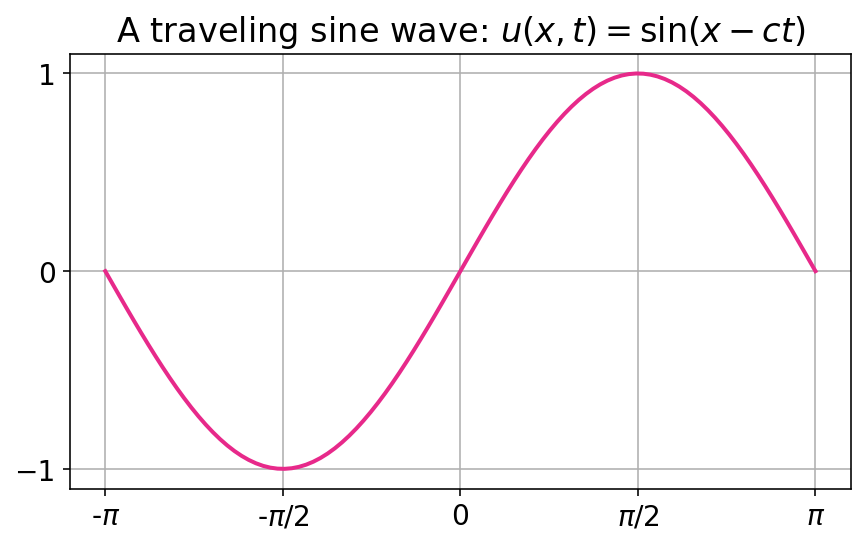

In [2]:
f = lambda x: np.sin(x)
x = np.linspace(-np.pi, np.pi, 100)
y = f(x)

# Initialize plot
fig, ax = plt.subplots(figsize = (7, 4))
wave, = ax.plot(x, y, "-", color = "C3", lw = 2)

ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax.set_xticklabels((r"-$\pi$", r"-$\pi/2$", "0", r"$\pi/2$", r"$\pi$"))
ax.set_yticks((-1, 0, 1))
ax.grid(True)
ax.set_title(r"A traveling sine wave: $u(x, t) = \sin(x - ct)$")

# Transpose f(x) -> f(x - ct)
def shift(t, c = 1):
    # Transpose the wave
    new_y = f(x - c*t)
    wave.set_ydata(new_y)
    return(wave,)

# Set up animation
ani = anim.FuncAnimation(fig, shift, frames = 190, 
                         fargs = (0.1,),
                         interval = 30, blit = True)

In [ ]:
# Display animation inline
HTML(ani.to_jshtml())

In [ ]:
# Save as html to embed 
movie = ani.to_jshtml()
outfile = Path("traveling-sin-wave.html")
outfile.write_text(movie)

The function $f(x)$ need not be periodic. The next example shows a traveling Gaussian wave packet.

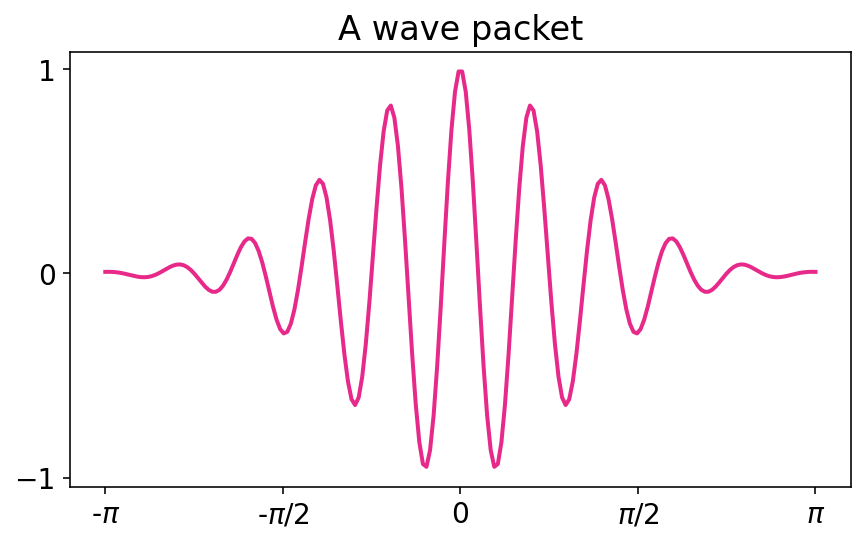

In [3]:
# Define shape of wavepacket
f = lambda x: np.exp(- x**2 / 2) * np.cos(10*x)
x = np.linspace(-np.pi, np.pi, 200)
y = f(x)

# Initialize plot
fig, ax = plt.subplots(figsize = (7, 4))
wavepacket, = ax.plot(x, y, "-", color = "C3", lw = 2)

ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax.set_xticklabels((r"-$\pi$", r"-$\pi/2$", "0", r"$\pi/2$", r"$\pi$"))
ax.set_yticks((-1, 0, 1))
ax.set_title(r"A wave packet")

# Transpose f(x) -> f(x - ct)
def shift(t, c = 1):
    # Transpose the wave
    new_y = f(x - c*t)
    wavepacket.set_ydata(new_y)
    return(wavepacket,)

ani = anim.FuncAnimation(fig, shift, frames = 200, 
                         fargs = (-0.03,),
                         interval = 30, blit = True)

In [ ]:
# Display animation inline
HTML(ani.to_jshtml())

In [ ]:
# Save as html to embed 
movie = ani.to_jshtml()
outfile = Path("wave-packet.html")
outfile.write_text(movie)

### Example 2: Superposition of traveling waves

The next example shows how the superposition of two traveling waves produces the motion of a plucked string. This is the d'Alembert solution to the wave equation.

First, set up a function to produce an odd periodic extension of the initial shape

In [4]:
def y(x):
    """Odd periodic extension of plucked string"""
    pi = np.pi
    x = x % (2 * pi)
    if (x < pi/2):
        h = x / (pi/2)
    elif (x >= pi/2) and (x < 3 * pi/2):
        h = 1 - (x - pi/2)/(pi/2)
    else:
        h = (x - 2*pi)/(pi/2)
    return(h)

f = np.vectorize(y)

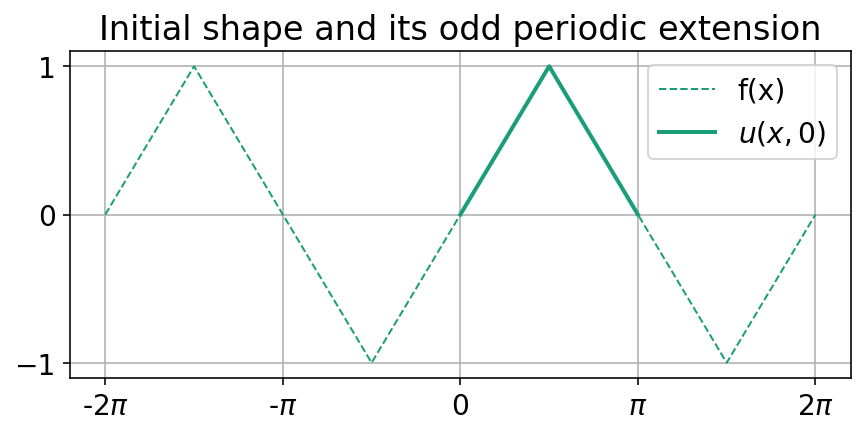

In [5]:
# Initial shape of plucked string
pi = np.pi
x = np.concatenate((np.linspace(-2*pi, 2*pi), 
                   [-3*pi/2, -pi, -pi/2, 0, pi/2, pi, 3*pi/2]))
x.sort()
fig, ax = plt.subplots(figsize = (7, 3))

ax.plot(x, f(x), "--", lw = 1, label = r"f(x)")
x = x[np.logical_and(x >= 0, x <= np.pi)]
ax.plot(x, f(x), color = "C0", lw = "2", label = r"$u(x, 0)$")

ax.set_xticks([-2*pi, -pi, 0, pi, 2*pi])
ax.set_xticklabels((r"-2$\pi$", r"-$\pi$", "0", r"$\pi$", r"$2\pi$"))
ax.set_yticks((-1, 0, 1))
ax.grid()
ax.legend()
ax.set_title(r"Initial shape and its odd periodic extension")

# Uncomment below to save
outfile = Path("plucked-string.png")
#fig.savefig(outfile, dpi = 150)

The next animation plots the constituent traveling waves, and their superposition

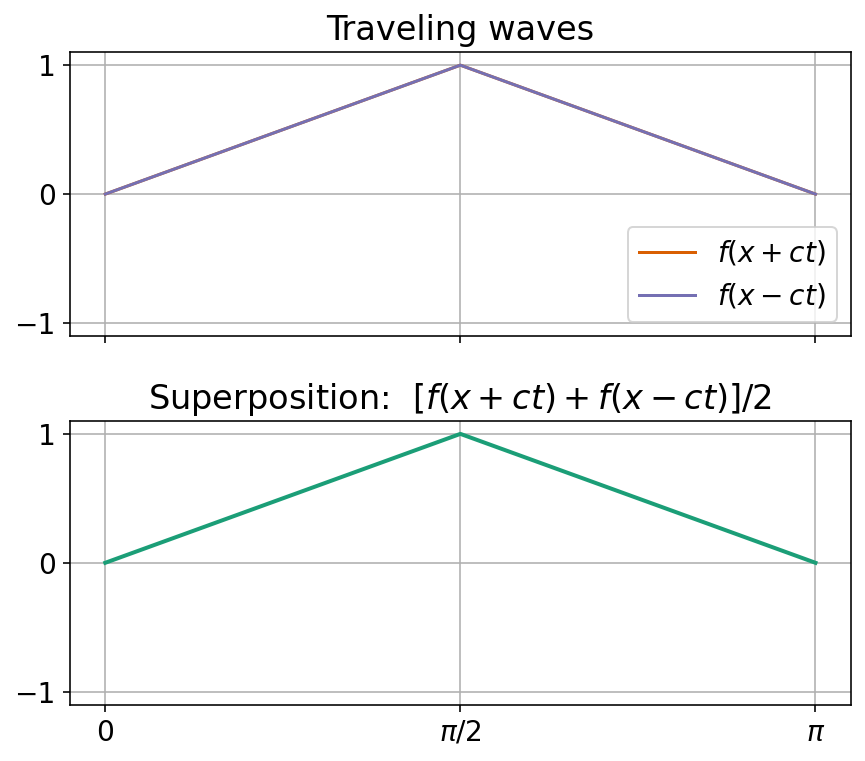

In [6]:
# Compute initial shape of string
x = np.append(np.linspace(0, np.pi, 99), np.pi/2)
x.sort()
y = f(x)

# Plot initial shape
fig, (ax0, ax1) = plt.subplots(figsize = (7, 6), nrows = 2, 
                           sharex = "all", sharey = "all")
plt.subplots_adjust(hspace = 0.3)
lwave,  = ax0.plot(x, y, "-", color = "C1", 
                   label = r"$f(x + ct)$")
rwave,  = ax0.plot(x, y, "-", color = "C2", 
                   label = r"$f(x - ct)$")
string, = ax1.plot(x, y, "-", color = "C0", lw = 2)

ax0.set_title(r"Traveling waves")
ax0.legend(loc = "lower right")
ax1.set_title(r"Superposition:  $[f(x + ct) + f(x - ct)]/2$")
ax1.set_xticks([0, np.pi/2, np.pi])
ax1.set_xticklabels(("0", r"$\pi/2$", r"$\pi$"))
for ax in (ax0, ax1):
    ax.set_ylim([-1.1, 1.1])
    ax.set_yticks((-1, 0, 1))
    ax.grid(True)

# Compute traveling wave solution
def shift(t, c = 1):
    # Transpose each traveling wave
    new_l, new_r = f(x + c*t), f(x - c*t)
    new_y = (new_l + new_r)/2
    rwave.set_ydata(new_r)
    lwave.set_ydata(new_l)
    string.set_ydata(new_y)
    return(lwave, rwave, string)

# Animate
ani = anim.FuncAnimation(fig, shift, frames = 189, 
                         fargs = (0.1,),
                         interval = 30, blit = True)

In [ ]:
# Display animation inline
HTML(ani.to_jshtml())

In [ ]:
# Save as html to embed 
movie = ani.to_jshtml()
outfile = Path("superposition-lwave-rwave.html")
outfile.write_text(movie)

Another, somewhat psychedelic version of the same plot:

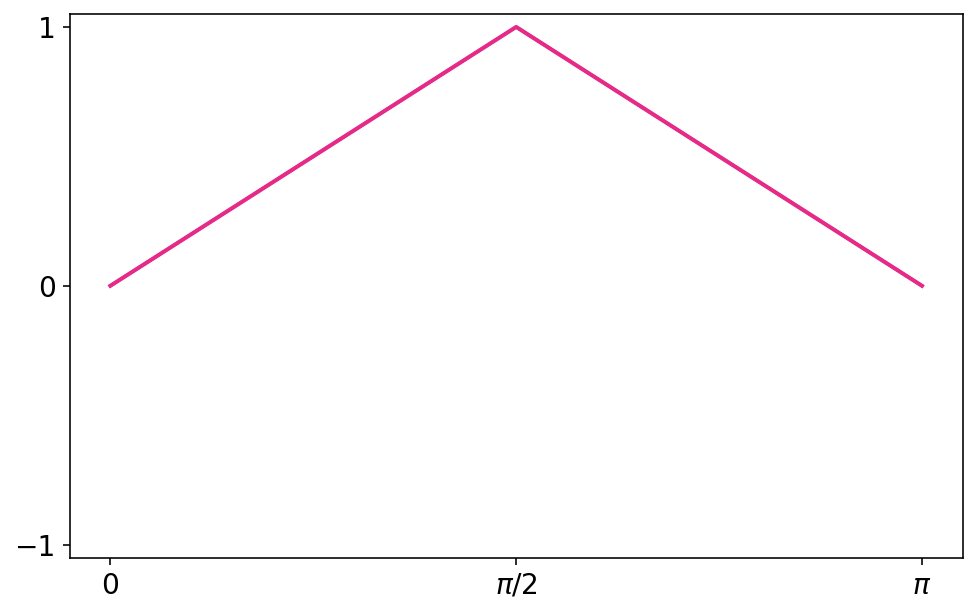

In [7]:
x = np.append(np.linspace(0, np.pi, 99), np.pi/2)
x.sort()
y = f(x)

fig, ax = plt.subplots(figsize = (8, 5))
lwave,  = ax.plot(x, y, "-")
rwave,  = ax.plot(x, y, "-")
string, = ax.plot(x, y, "-", color = "C3", lw = 2)

ax.set_xticks([0, np.pi/2, np.pi])
ax.set_xticklabels(("0", r"$\pi/2$", r"$\pi$"))
ax.set_ylim([-1.05, 1.05])
ax.set_yticks((-1, 0, 1))

def shift(t, c = 1):
    # Transpose each traveling wave
    new_l, new_r = f(x + c*t), f(x - c*t)
    new_y = (new_l + new_r)/2
    lwave.set_ydata(new_l)
    rwave.set_ydata(new_r)
    string.set_ydata(new_y)
    return(lwave, rwave, string)

ani = anim.FuncAnimation(fig, shift, frames = 189, 
                         fargs = (0.1,),
                         interval = 30, blit = True)

In [ ]:
# Display animation inline
HTML(ani.to_jshtml())

The next example shows the result of starting with an asymmetric initial condition. For this example, use a linear interpolating function to define the initial shape and its odd periodic extension

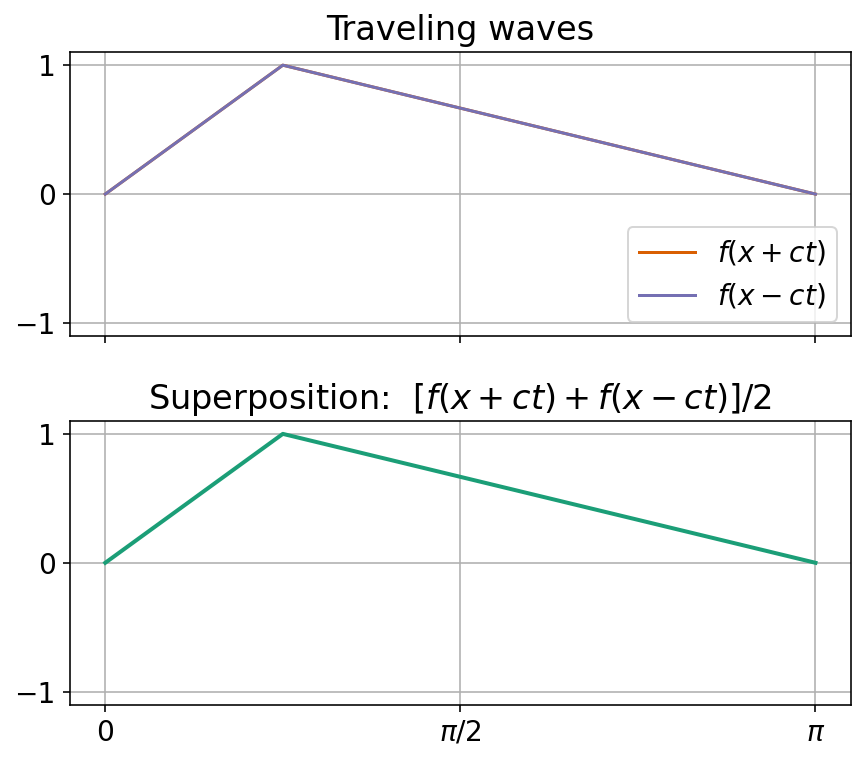

In [8]:
# Plucked string with asymmetric initial shape
from scipy import interpolate

def y2(x):
    """Odd periodic extension of plucked string"""
    pi = np.pi
    # Use linear interpolation to generate initial shape
    x0, y0 = [0, pi/4, pi, 7*pi/4, 2*pi], [0, 1, 0, -1, 0]
    u0 = interpolate.interp1d(x0, y0)
    # Make periodic
    x = x % (2 * pi)
    return(u0(x))

f2 = np.vectorize(y2)

# Generate initial shape
x = np.append(np.linspace(0, np.pi, 98), np.pi/4)
x.sort()
y = f2(x)

# Plot initial shape
fig, (ax0, ax1) = plt.subplots(figsize = (7, 6), nrows = 2, 
                           sharex = "all", sharey = "all")
plt.subplots_adjust(hspace = 0.3)
lwave,  = ax0.plot(x, y, "-", color = "C1", 
                   label = r"$f(x + ct)$")
rwave,  = ax0.plot(x, y, "-", color = "C2", 
                   label = r"$f(x - ct)$")
string, = ax1.plot(x, y, "-", color = "C0", lw = 2)

ax0.set_title(r"Traveling waves")
ax0.legend(loc = "lower right")
ax1.set_title(r"Superposition:  $[f(x + ct) + f(x - ct)]/2$")
ax1.set_xticks([0, np.pi/2, np.pi])
ax1.set_xticklabels(("0", r"$\pi/2$", r"$\pi$"))
for ax in (ax0, ax1):
    ax.set_ylim([-1.1, 1.1])
    ax.set_yticks((-1, 0, 1))
    ax.grid(True)

# Compute traveling wave solution
def shift(t, c = 1):
    # Transpose each traveling wave
    new_l, new_r = f2(x + c*t), f2(x - c*t)
    new_y = (new_l + new_r)/2
    rwave.set_ydata(new_r)
    lwave.set_ydata(new_l)
    string.set_ydata(new_y)
    return(lwave, rwave, string)

# Animate
ani = anim.FuncAnimation(fig, shift, frames = 189, 
                         fargs = (0.1,),
                         interval = 30, blit = True)

In [ ]:
# Display animation inline
HTML(ani.to_jshtml())

In [ ]:
# Save as html to embed 
movie = ani.to_jshtml()
outfile = Path("asymmetric-initial-shape.html")
outfile.write_text(movie)

Use cubic interpolation to create a smooth shape

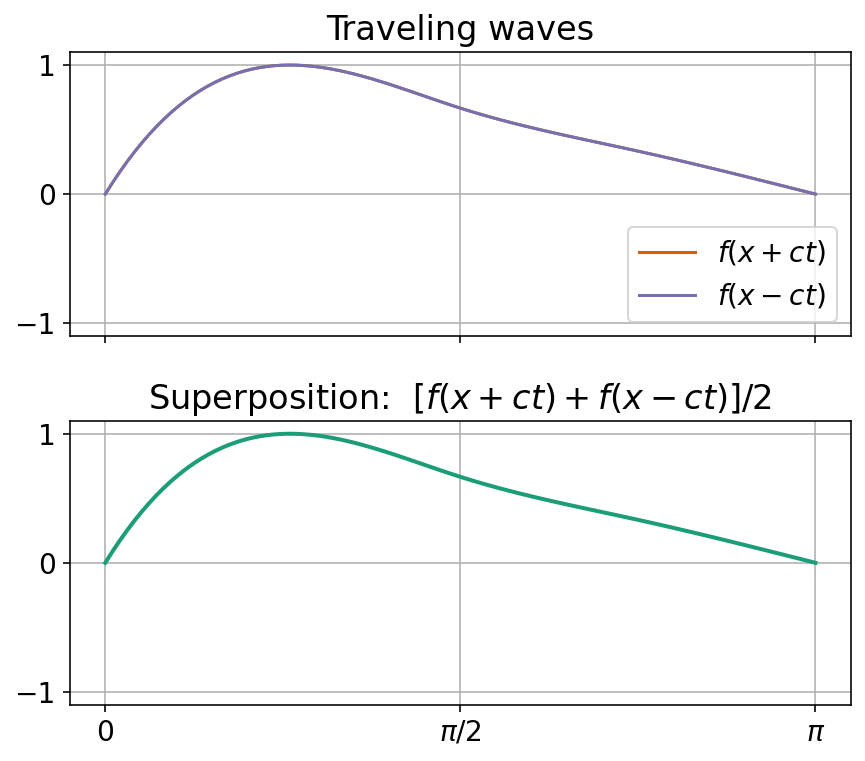

In [9]:
# Traveling wave solution to plucked string 
# with asymmetric initial shape
def y3(x):
    """Odd periodic extension of plucked string"""
    pi = np.pi
    # Use cubic interpolation to generate smooth initial shape
    x0 = np.linspace(0, 2*pi, 9)
    y0 = f2(x0)
    u0 = interpolate.interp1d(x0, y0, kind = 3)
    x = x % (2 * pi)
    return(u0(x))

f3 = np.vectorize(y3) # To work on numpy arrays

# Generate initial shape
x = np.append(np.linspace(0, np.pi, 98), np.pi/4)
x.sort()
y = f3(x)

# Plot initial shape
fig, (ax0, ax1) = plt.subplots(figsize = (7, 6), nrows = 2, 
                           sharex = "all", sharey = "all")
plt.subplots_adjust(hspace = 0.3)
lwave,  = ax0.plot(x, y, "-", color = "C1", 
                   label = r"$f(x + ct)$")
rwave,  = ax0.plot(x, y, "-", color = "C2", 
                   label = r"$f(x - ct)$")
string, = ax1.plot(x, y, "-", color = "C0", lw = 2)

ax0.set_title(r"Traveling waves")
ax0.legend(loc = "lower right")
ax1.set_title(r"Superposition:  $[f(x + ct) + f(x - ct)]/2$")
ax1.set_xticks([0, np.pi/2, np.pi])
ax1.set_xticklabels(("0", r"$\pi/2$", r"$\pi$"))
for ax in (ax0, ax1):
    ax.set_ylim([-1.1, 1.1])
    ax.set_yticks((-1, 0, 1))
    ax.grid(True)

# Compute traveling wave solution
def shift(t, c = 1):
    # Transpose each traveling wave
    new_l, new_r = f3(x + c*t), f3(x - c*t)
    new_y = (new_l + new_r)/2
    rwave.set_ydata(new_r)
    lwave.set_ydata(new_l)
    string.set_ydata(new_y)
    return(lwave, rwave, string)

# Animate
ani = anim.FuncAnimation(fig, shift, frames = 189, 
                         fargs = (0.1,),
                         interval = 30, blit = True)

In [ ]:
# Display animation inline
HTML(ani.to_jshtml())

In [ ]:
# Save as html to embed 
movie = ani.to_jshtml()
outfile = Path("smooth-initial-shape.html")
outfile.write_text(movie)